<a href="https://colab.research.google.com/github/Hosnooo/et3_Task/blob/main/et3_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Storing data in a Pandas dataframe


In [289]:
url = 'https://raw.githubusercontent.com/Hosnooo/et3_Task/main/drinkMenu.csv'
data = pd.read_csv(url)
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [290]:
data.shape

(242, 18)

In [291]:
data.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [292]:
print(data.columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')


In [293]:
# Renaming the columns to remove spaces before and after words
data.columns = ['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)']

# Finding & Removing Duplicates


In [294]:
data.duplicated().sum()

0

No duplicates were found

#Finding and filling null values


In [295]:
data.isnull().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
dtype: int64

There is only one null value in the "caffeine" column. This can be filled by the average of the caffeine content in the corresponding beverage category. However, it looks like the Caffeine content is categorized and isn't a numeric feature. Thus, replacing the null value with the most frequent value will be more suitable.

In [296]:
nan_row  = data[data.isnull().any(axis=1)]
nan_row.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN


In [297]:
columns = nan_row.columns
temp = np.array(nan_row[columns[1]])
nan_category = temp[0]
print(nan_category)

Iced Brewed Coffee (With Milk & Classic Syrup)


In [298]:
rows_to_mode = data.loc[data[columns[1]] == nan_category]
Caff_content = rows_to_mode[columns[-1]]
mode = Caff_content.mode()
print(mode)

0    125
1     90
dtype: object


In [299]:
data[columns[-1]] = data[columns[-1]].fillna(mode[0])
data.isnull().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              0
dtype: int64

# Studying necessity of features

First of all, the beverage category in a redundant feature; where the name of each beverage under different categories is mentioned. Also, different beverages of same categories have variety of features, and so, the category column can be dropped safely.

In [300]:
data_diet = data.drop(columns = columns[0], axis = 1)
data_diet.head()

,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


Determining how much any of other features is important depends on our choice of the output feature. For this task, I am supposed to give some insights about both of the sugar and calories content. Thus, the features that doesn't corelate significantly with these 2 features will be dropped.

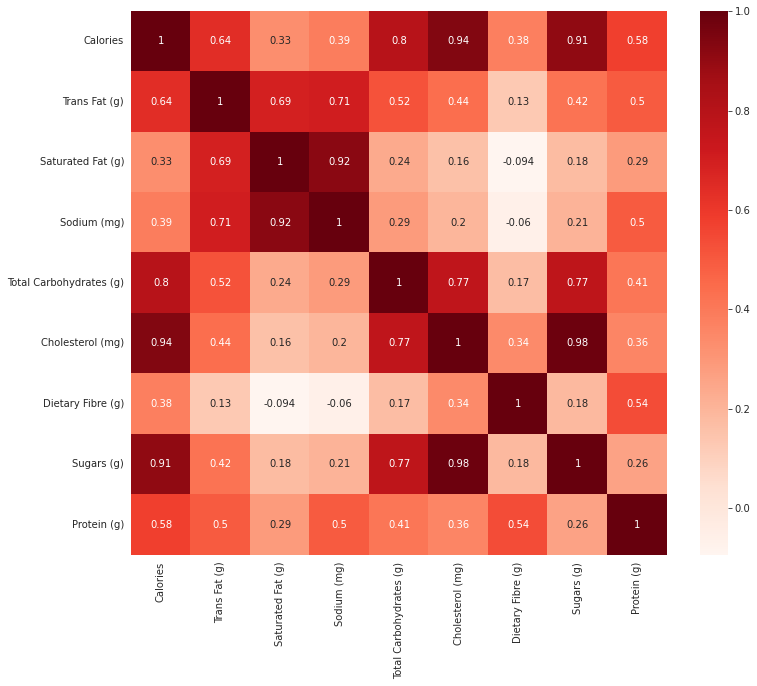

In [301]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [302]:
#Correlation with the 2 output variables
cor_target_cal = abs(cor["Calories"])
cor_target_sug = abs(cor["Sugars (g)"])

#Selecting highly correlated features
Calories_relevant_features = cor_target_cal[cor_target_cal>0.5]
Sugars_relevant_features = cor_target_sug[cor_target_sug>0.5]
print(Calories_relevant_features)
print('*******')
print(Sugars_relevant_features)

Calories                   1.000000
Trans Fat (g)              0.642818
Total Carbohydrates (g)    0.795037
Cholesterol (mg)           0.940034
Sugars (g)                 0.909675
Protein (g)                0.578453
Name: Calories, dtype: float64
*******
Calories                   0.909675
Total Carbohydrates (g)    0.771407
Cholesterol (mg)           0.984196
Sugars (g)                 1.000000
Name: Sugars (g), dtype: float64


In [303]:
relevant_columns = ['Beverage', 'Beverage_prep','Calories', 'Trans Fat (g)', 'Total Carbohydrates (g)',
                    'Cholesterol (mg)', 'Sugars (g)', 'Protein (g)', 'Caffeine (mg)']
data_diet = data_diet.filter(relevant_columns)
data_diet.head()

,Beverage,Beverage_prep,Calories,Trans Fat (g),Total Carbohydrates (g),Cholesterol (mg),Sugars (g),Protein (g),Caffeine (mg)
0,Brewed Coffee,Short,3,0.0,5,0,0,0.3,175
1,Brewed Coffee,Tall,4,0.0,10,0,0,0.5,260
2,Brewed Coffee,Grande,5,0.0,10,0,0,1.0,330
3,Brewed Coffee,Venti,5,0.0,10,0,0,1.0,410
4,Caffè Latte,Short Nonfat Milk,70,0.1,75,10,9,6.0,75


# Visualization

In [304]:
# Labelling the beverage names
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_diet['Beverage_code'] = labelencoder.fit_transform(data_diet['Beverage'])
data_diet.head()

,Beverage,Beverage_prep,Calories,Trans Fat (g),Total Carbohydrates (g),Cholesterol (mg),Sugars (g),Protein (g),Caffeine (mg),Beverage_code
0,Brewed Coffee,Short,3,0.0,5,0,0,0.3,175,1
1,Brewed Coffee,Tall,4,0.0,10,0,0,0.5,260,1
2,Brewed Coffee,Grande,5,0.0,10,0,0,1.0,330,1
3,Brewed Coffee,Venti,5,0.0,10,0,0,1.0,410,1
4,Caffè Latte,Short Nonfat Milk,70,0.1,75,10,9,6.0,75,3


Note that the label encoding method is not suitable if this data set is subjected to learning methodes. In this task, I am only using the labels as names to have clear plots.

##Calories Content

Text(0.5, 1.0, 'Calories, Beverage')

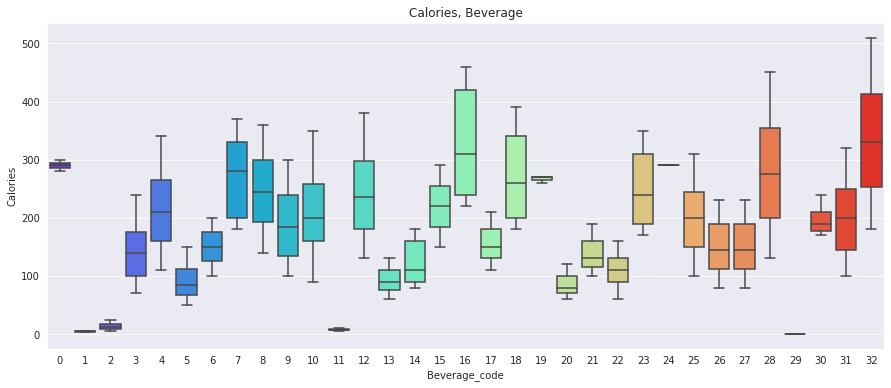

In [331]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Beverage_code',y='Calories',data=data_diet, palette='rainbow')
plt.title("Calories, Beverage")

By neglecting the outliers, it is obvious that beverages of code 16 & 32 contains the heighest distribution of calories. Therefore, we will give these 2 types of beverages another look. But first we will look into the preparation feature to see how it interfers with the calories content.

Text(0.5, 1.0, 'Calories, Beverage Preparation')

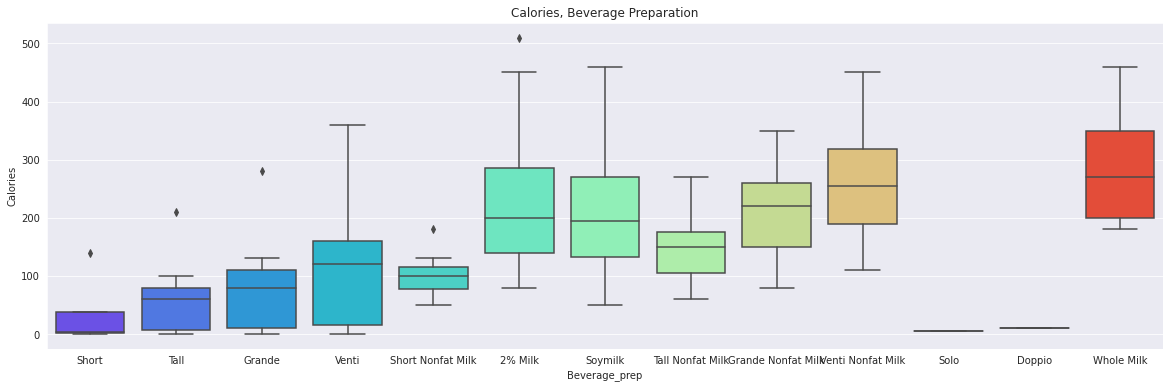

In [332]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Beverage_prep',y='Calories',data=data_diet, palette='rainbow')
plt.title("Calories, Beverage Preparation")

It is obvious that the preparation method significantly affects the calories content. Even though 'Whole milk' has the highest calories content, the mean and maximum content of calories of some types are close to each other. So now we should mix between the beverage type and its preparation method and see how what the plot will tell.

In [337]:
calories_data = data_diet.loc[data_diet['Beverage_code'].isin([16,32])]
calories_data = calories_data.loc[data_diet['Beverage_prep'].isin(['Whole Milk','Venti Nonfat Milk', '2% Milk', 'Soymilk'])]

calories_data = calories_data.filter(['Beverage','Beverage_code','Beverage_prep', 'Calories'])
calories_data

,Beverage,Beverage_code,Beverage_prep,Calories
75,White Chocolate Mocha (Without Whipped Cream),32,2% Milk,200
76,White Chocolate Mocha (Without Whipped Cream),32,Soymilk,180
78,White Chocolate Mocha (Without Whipped Cream),32,2% Milk,310
79,White Chocolate Mocha (Without Whipped Cream),32,Soymilk,280
81,White Chocolate Mocha (Without Whipped Cream),32,2% Milk,400
82,White Chocolate Mocha (Without Whipped Cream),32,Soymilk,370
83,White Chocolate Mocha (Without Whipped Cream),32,Venti Nonfat Milk,450
84,White Chocolate Mocha (Without Whipped Cream),32,2% Milk,510
85,White Chocolate Mocha (Without Whipped Cream),32,Soymilk,460
209,Java Chip (Without Whipped Cream),16,Whole Milk,240


Text(0.5, 1.0, 'Calories, Beverage Preparation')

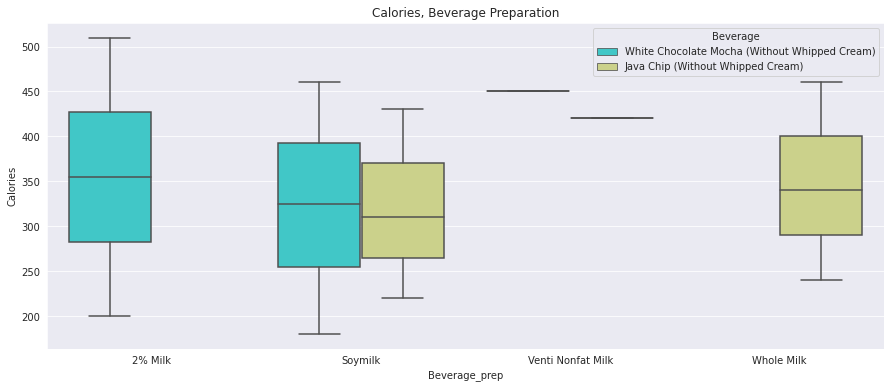

In [360]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Beverage_prep',y='Calories',data=calories_data, palette='rainbow', hue = 'Beverage')
plt.title("Calories, Beverage Preparation")

As predicted, the result changed; on average, 'Venti Nofate Milk' contains the largest amount of calories. However there are some outliers with higher amount of calories in other types.

In conclusion, both 'Java Chip' & 'White chocolate Mocca' are of the highest calories content; and it is most likely that whenever any of them is prepared by 'Venti Nofate Milk' it will have a large calories content.

##Sugars

Text(0.5, 1.0, 'Sugars, Beverage')

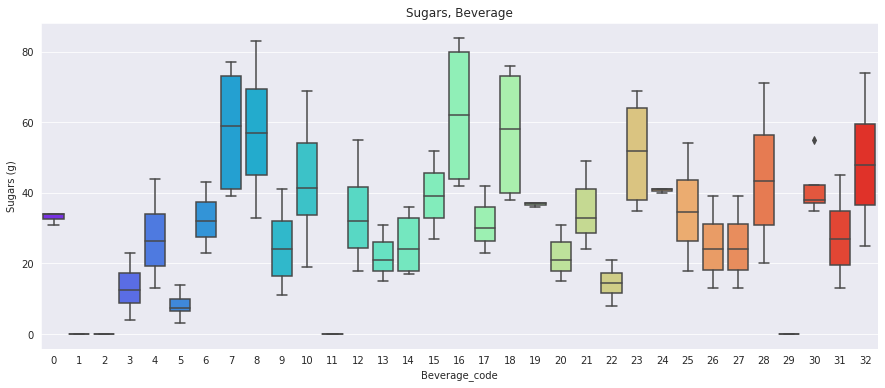

In [333]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Beverage_code',y='Sugars (g)',data=data_diet, palette='rainbow')
plt.title("Sugars, Beverage")

It is very obvious that beverages of codes 7,8,16,18 has the highest sugars neglecting outliers.

Text(0.5, 1.0, 'Sugars, Beverage Preparation')

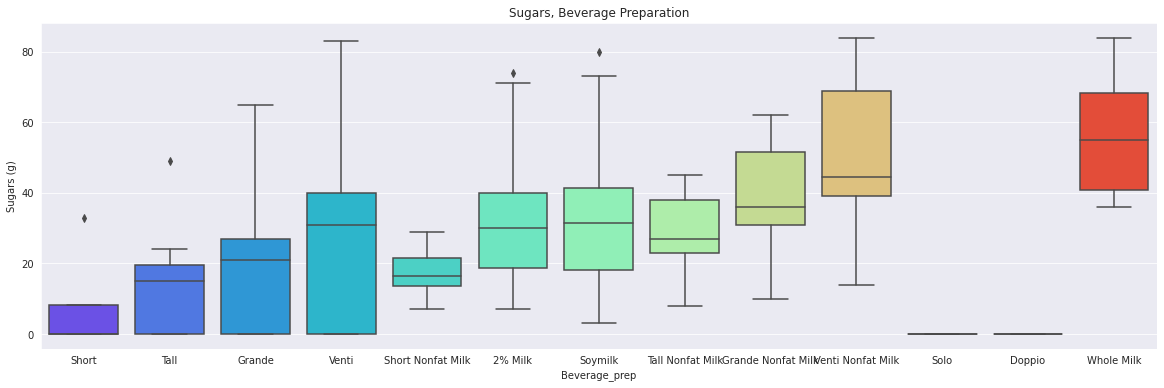

In [349]:
plt.figure(figsize=(20,6))
sns.boxplot(x='Beverage_prep',y='Sugars (g)',data=data_diet, palette='rainbow')
plt.title("Sugars, Beverage Preparation")

'Venti', 'Venti Nonfat Milk' and 'Whole Milk' outstands other preparation methodes.

In [362]:
sugars_data = data_diet.loc[data_diet['Beverage_code'].isin([7,8,16,18])]
sugars_data = sugars_data.loc[data_diet['Beverage_prep'].isin(['Venti','Venti Nonfat Milk','Whole Milk'])]

sugars_data = sugars_data.filter(['Beverage','Beverage_code','Beverage_prep', 'Sugars (g)'])
sugars_data

,Beverage,Beverage_code,Beverage_prep,Sugars (g)
101,Caramel Apple Spice (Without Whipped Cream),8,Venti,83
191,Mocha (Without Whipped Cream),18,Whole Milk,40
194,Mocha (Without Whipped Cream),18,Whole Milk,58
196,Mocha (Without Whipped Cream),18,Venti Nonfat Milk,76
197,Mocha (Without Whipped Cream),18,Whole Milk,76
200,Caramel (Without Whipped Cream),7,Whole Milk,41
203,Caramel (Without Whipped Cream),7,Whole Milk,59
205,Caramel (Without Whipped Cream),7,Venti Nonfat Milk,77
206,Caramel (Without Whipped Cream),7,Whole Milk,77
209,Java Chip (Without Whipped Cream),16,Whole Milk,44


Text(0.5, 1.0, 'Sugars, Beverage Preparation')

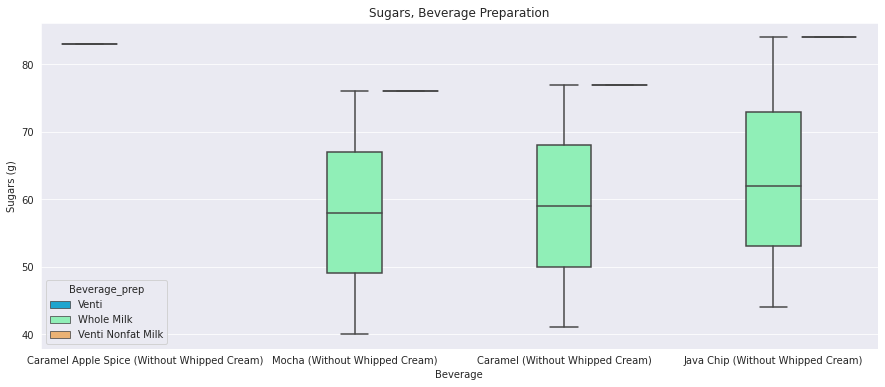

In [363]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Beverage',y='Sugars (g)', data=sugars_data, palette='rainbow', hue = 'Beverage_prep')
plt.title("Sugars, Beverage Preparation")

In conclusion, 'Java Chip' contains the highest sugars if prepared by 'Venti Nonfat Milk', and the content decreases (but still a relatively higher content) if prepared by 'Whole Milk'.
'Caramel Apple Spice' if prepared  by 'Venti' contains a very high sugar content as well.